In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
!ls

Analysis.ipynb
Bandit_experiment.ipynb
__pycache__
base_analysis.ipynb
cfg.py
data.py
eGreedyMAB_2000_250_BernoulliArm_0.5_Naive_results.pkl
eGreedyMAB_2000_250_BernoulliArm_0.5_Optimistic_results.pkl
eGreedyMAB_2000_250_BernoulliArm_1.0_Naive_results.pkl
eGreedyMAB_2000_250_BernoulliArm_1.0_Optimistic_results.pkl
eGreedyMAB_2000_250_GaussianArm_0.5_Naive_results.pkl
eGreedyMAB_2000_250_GaussianArm_0.5_Optimistic_results.pkl
eGreedyMAB_2000_250_GaussianArm_1.0_Naive_results.pkl
eGreedyMAB_2000_250_GaussianArm_1.0_Optimistic_results.pkl
linucb.py
mab.py
main.py


In [3]:
def process(df):
    ## get cumulative reward
    cumsum_base = np.array([], dtype='float')
    for e in df['sim'].unique():
        rundf = df[df['sim'] == e]
        run_cumsum = np.cumsum(rundf['reward'])
        cumsum_base = np.append(cumsum_base, run_cumsum)
    df['cumulative_reward'] = cumsum_base
    
    ## check if the optimal arm is selected at each run
    df['chosen_optimal'] = (df['chosen_arm'] == df['optimal_arm']).astype('int')
    
    ## groupby
    result = df[['epsilon', 'step', 'reward', 'chosen_optimal']].groupby(by=['epsilon', 'step']).mean(numeric_only=False)
    result.reset_index(drop=False, inplace=True)
    
    return result

In [4]:
def plot_results(dfs, column, title, figsize=(12, 8)):
    split = column.split('_')
    split[0] = split[0][0].upper() + split[0][1:]
    ylabel = ' '.join(split)
    
    plt.figure(figsize=figsize)
    for item in dfs:
        plt.plot(item[column], label=f"eps={item['epsilon'].iloc[0]}")
    plt.grid(True)
    plt.xlabel("Step")
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()

# Naive approach

## alpha = 1

In [5]:
with open("./eGreedyMAB_2000_250_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    bernoulli = pickle.load(f)
    
with open("./eGreedyMAB_2000_250_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    gaussian = pickle.load(f)

In [6]:
print('bernoulli')
display(bernoulli[0].head())
print()
display(bernoulli[0].tail())
print()
print('gaussian')
display(gaussian[0].head())
print()
display(gaussian[0].tail())

bernoulli


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,4,1,0.0
1,0.0,0,1,0,1,0.0
2,0.0,0,2,1,1,0.0
3,0.0,0,3,3,1,1.0
4,0.0,0,4,3,1,1.0


,epsilon,sim,step,chosen_arm,optimal_arm,reward
499995,0.0,1999,245,3,1,0.0
499996,0.0,1999,246,3,1,0.0
499997,0.0,1999,247,3,1,1.0
499998,0.0,1999,248,3,1,1.0
499999,0.0,1999,249,3,1,1.0



gaussian


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,3,4,3.535716
1,0.0,0,1,3,4,1.687428
2,0.0,0,2,3,4,4.182461
3,0.0,0,3,3,4,3.946519
4,0.0,0,4,3,4,3.281402


,epsilon,sim,step,chosen_arm,optimal_arm,reward
499995,0.0,1999,245,4,4,12.929717
499996,0.0,1999,246,4,4,11.999418
499997,0.0,1999,247,4,4,13.548339
499998,0.0,1999,248,4,4,13.677329
499999,0.0,1999,249,4,4,11.574470


In [7]:
bern_results = []
for df in tqdm(bernoulli):
    bern_results.append(process(df))
    
gaus_results = []
for df in tqdm(gaussian):
    gaus_results.append(process(df))

100%|█████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:14<00:00,  1.77s/it]


In [8]:
print(f"Bernoulli\n")
print("Greedy")
display(bern_results[0].head())
print()
display(bern_results[0].tail())
print()

print("egreedy")
display(bern_results[1].head())
print()
display(bern_results[1].tail())

Bernoulli

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,0.5350,0.1940
1,0.0,1,0.6305,0.2460
2,0.0,2,0.6365,0.2635
3,0.0,3,0.6685,0.2745
4,0.0,4,0.6730,0.2795


,epsilon,step,reward,chosen_optimal
245,0.0,245,0.6640,0.2825
246,0.0,246,0.6725,0.2825
247,0.0,247,0.6920,0.2825
248,0.0,248,0.6815,0.2825
249,0.0,249,0.6785,0.2825



egreedy


,epsilon,step,reward,chosen_optimal
0,0.354,0,0.5205,0.2090
1,0.354,1,0.5940,0.2470
2,0.354,2,0.5915,0.2415
3,0.354,3,0.6175,0.2660
4,0.354,4,0.6140,0.2910


,epsilon,step,reward,chosen_optimal
245,0.354,245,0.6505,0.3010
246,0.354,246,0.6580,0.2925
247,0.354,247,0.6435,0.3000
248,0.354,248,0.6395,0.2905
249,0.354,249,0.6445,0.3145


In [9]:
print(f"Gaussian\n")
print("Greedy")
display(gaus_results[0].head())
print()
display(gaus_results[0].tail())
print()

print("egreedy")
display(gaus_results[1].head())
print()
display(gaus_results[1].tail())

Gaussian

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,5.279994,0.1980
1,0.0,1,5.421088,0.2035
2,0.0,2,5.433140,0.2045
3,0.0,3,5.466570,0.2060
4,0.0,4,5.489021,0.2075


,epsilon,step,reward,chosen_optimal
245,0.0,245,8.087390,0.3600
246,0.0,246,8.126126,0.3600
247,0.0,247,8.138608,0.3600
248,0.0,248,8.087076,0.3600
249,0.0,249,8.099635,0.3605



egreedy


,epsilon,step,reward,chosen_optimal
0,0.172,0,5.234368,0.2000
1,0.172,1,5.405155,0.2130
2,0.172,2,5.702091,0.2330
3,0.172,3,5.961572,0.2505
4,0.172,4,6.261924,0.2675


,epsilon,step,reward,chosen_optimal
245,0.172,245,8.848943,0.5040
246,0.172,246,8.912649,0.5005
247,0.172,247,8.822055,0.5000
248,0.172,248,8.924757,0.5140
249,0.172,249,9.053624,0.5285


### Optimal Action %

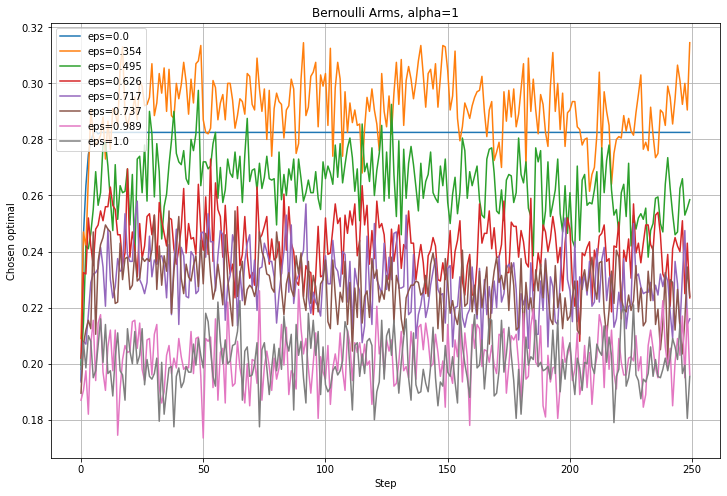

In [10]:
plot_results(bern_results, column='chosen_optimal', title="Bernoulli Arms, alpha=1")

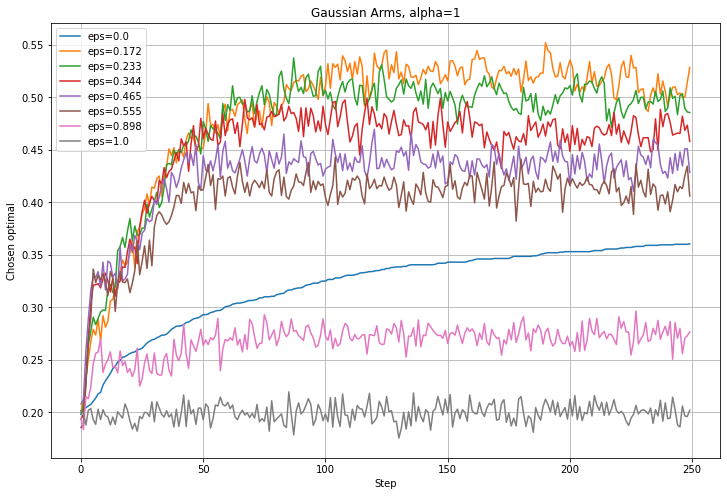

In [11]:
plot_results(gaus_results, column='chosen_optimal', title="Gaussian Arms, alpha=1")

### Average Reward

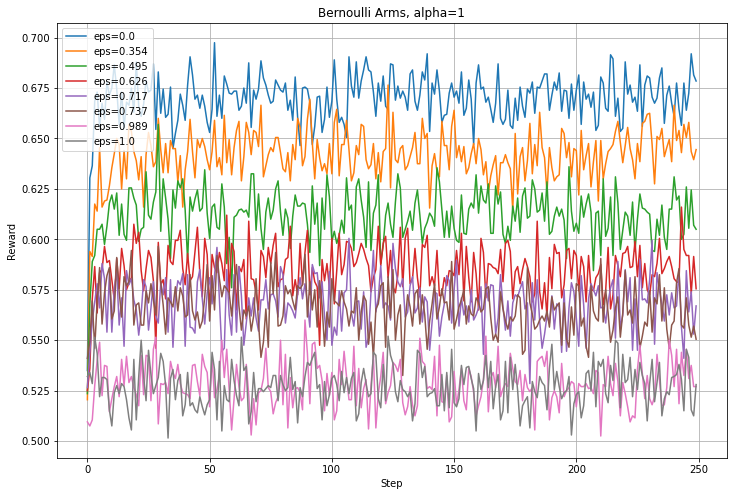

In [12]:
plot_results(bern_results, column='reward', title="Bernoulli Arms, alpha=1")

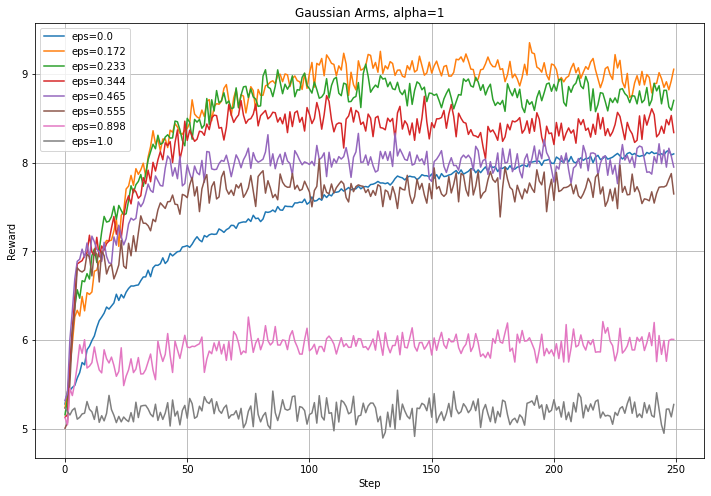

In [13]:
plot_results(gaus_results, column='reward', title="Gaussian Arms, alpha=1")

## alpha=0.5

In [22]:
with open("./eGreedyMAB_2000_250_BernoulliArm_0.5_Naive_results.pkl", 'rb') as f:
    bernoulli = pickle.load(f)
    
with open("./eGreedyMAB_2000_250_GaussianArm_0.5_Naive_results.pkl", 'rb') as f:
    gaussian = pickle.load(f)

In [23]:
print('bernoulli')
display(bernoulli[0].head())
print()
display(bernoulli[0].tail())
print()
print('gaussian')
display(gaussian[0].head())
print()
display(gaussian[0].tail())

bernoulli


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,2,0,0.0
1,0.0,0,1,1,0,0.0
2,0.0,0,2,1,0,1.0
3,0.0,0,3,1,0,1.0
4,0.0,0,4,1,0,1.0


,epsilon,sim,step,chosen_arm,optimal_arm,reward
499995,0.0,1999,245,0,0,1.0
499996,0.0,1999,246,0,0,0.0
499997,0.0,1999,247,0,0,1.0
499998,0.0,1999,248,0,0,1.0
499999,0.0,1999,249,0,0,1.0



gaussian


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,4,1,12.349673
1,0.0,0,1,4,1,13.980678
2,0.0,0,2,4,1,11.158616
3,0.0,0,3,4,1,13.143649
4,0.0,0,4,4,1,10.453257


,epsilon,sim,step,chosen_arm,optimal_arm,reward
499995,0.0,1999,245,1,1,14.325833
499996,0.0,1999,246,1,1,13.297337
499997,0.0,1999,247,1,1,14.762319
499998,0.0,1999,248,1,1,13.688168
499999,0.0,1999,249,1,1,13.253440


In [24]:
bern_results = []
for df in tqdm(bernoulli):
    bern_results.append(process(df))
    
gaus_results = []
for df in tqdm(gaussian):
    gaus_results.append(process(df))

100%|█████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:13<00:00,  1.67s/it]


In [25]:
print(f"Bernoulli\n")
print("Greedy")
display(bern_results[0].head())
print()
display(bern_results[0].tail())
print()

print("egreedy")
display(bern_results[1].head())
print()
display(bern_results[1].tail())

Bernoulli

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,0.5645,0.2050
1,0.0,1,0.5710,0.2430
2,0.0,2,0.5670,0.2605
3,0.0,3,0.5805,0.2740
4,0.0,4,0.5600,0.2770


,epsilon,step,reward,chosen_optimal
245,0.0,245,0.5850,0.2815
246,0.0,246,0.5595,0.2815
247,0.0,247,0.5685,0.2815
248,0.0,248,0.5700,0.2815
249,0.0,249,0.5750,0.2815



egreedy


,epsilon,step,reward,chosen_optimal
0,0.092,0,0.5205,0.1890
1,0.092,1,0.5370,0.2360
2,0.092,2,0.5650,0.2625
3,0.092,3,0.5785,0.2665
4,0.092,4,0.5530,0.2730


,epsilon,step,reward,chosen_optimal
245,0.092,245,0.5610,0.2775
246,0.092,246,0.5830,0.2775
247,0.092,247,0.5625,0.2775
248,0.092,248,0.5760,0.2780
249,0.092,249,0.5760,0.2780


In [26]:
print(f"Gaussian\n")
print("Greedy")
display(gaus_results[0].head())
print()
display(gaus_results[0].tail())
print()

print("egreedy")
display(gaus_results[1].head())
print()
display(gaus_results[1].tail())

Gaussian

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,10.058113,0.1955
1,0.0,1,10.139861,0.1955
2,0.0,2,10.137151,0.1955
3,0.0,3,10.091281,0.1955
4,0.0,4,10.100237,0.1955


,epsilon,step,reward,chosen_optimal
245,0.0,245,12.203304,0.245
246,0.0,246,12.207031,0.245
247,0.0,247,12.234591,0.245
248,0.0,248,12.197795,0.245
249,0.0,249,12.245667,0.245



egreedy


,epsilon,step,reward,chosen_optimal
0,0.051,0,10.253965,0.2020
1,0.051,1,10.292297,0.2010
2,0.051,2,10.331695,0.2030
3,0.051,3,10.389838,0.2085
4,0.051,4,10.390493,0.2070


,epsilon,step,reward,chosen_optimal
245,0.051,245,12.246704,0.2595
246,0.051,246,12.225505,0.2600
247,0.051,247,12.246872,0.2590
248,0.051,248,12.244091,0.2610
249,0.051,249,12.257880,0.2590


### Optimal action %

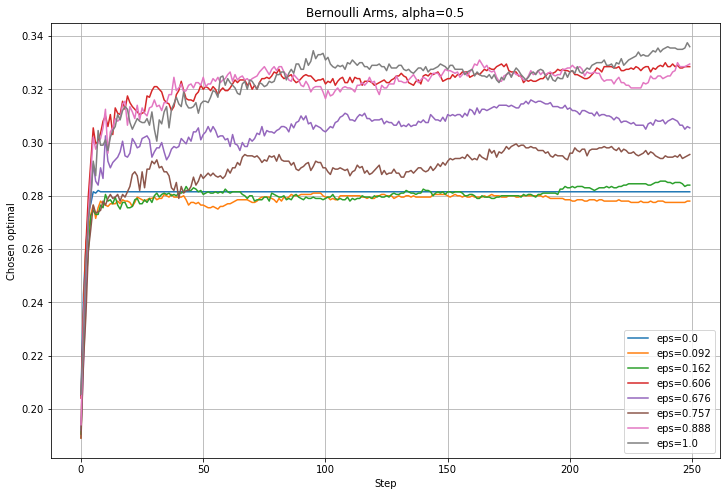

In [27]:
plot_results(bern_results, column='chosen_optimal', title="Bernoulli Arms, alpha=0.5")

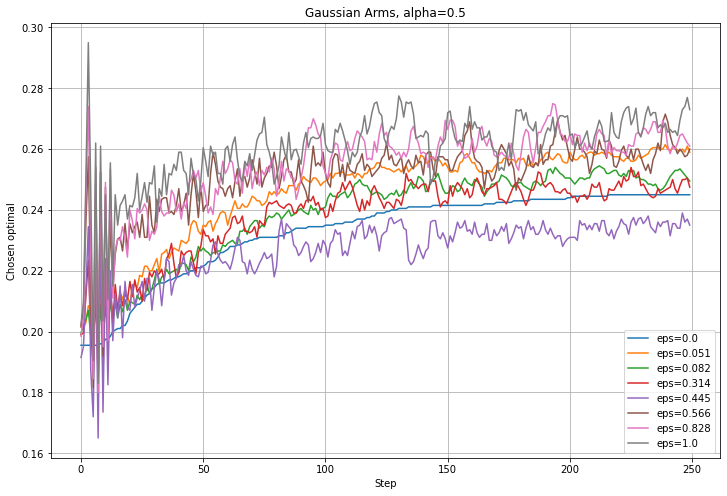

In [28]:
plot_results(gaus_results, column='chosen_optimal', title="Gaussian Arms, alpha=0.5")

### Average Reward

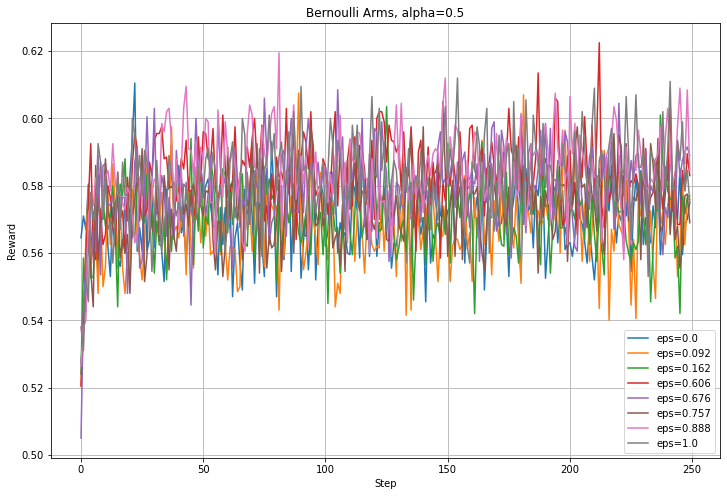

In [29]:
plot_results(bern_results, column='reward', title="Bernoulli Arms, alpha=0.5")

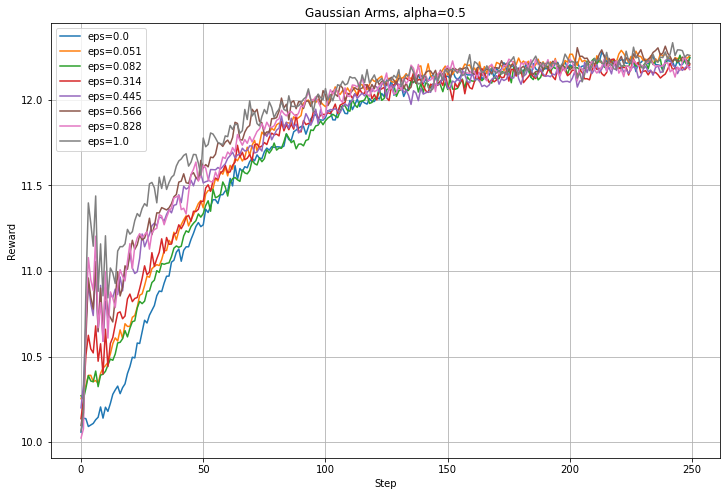

In [30]:
plot_results(gaus_results, column='reward', title="Gaussian Arms, alpha=0.5")

# Optimistic Approach